## Analysis code for Toy Example

In [1]:
import torch
import h5py
import numpy as np

from torch import nn
from matplotlib import pyplot as plt
from models import wgan
from torch.utils.data import Dataset

In [3]:
def gen_rand_noise():
    noise = torch.randn(BATCH_SIZE, 128)
    noise = noise.cpu()
    
    return noise

During the training, we used the normalized value of the pixel, and pList and rList converts the unit of pixel to normalized value to 1.

In [40]:
def pConverter(x):
    """
    x: an integer from 30 to 96.
    """
    if type(x) is not int:
        raise Exception("Should be integer")
    if x > 96 or x < 30:
        raise Exeption("Pixel should be in 29<x<97.")
        
    return x/128

def rConverter(x):
    """
    x: an integer from 14 to 32.
    """
    
    if type(x) is not int:
        raise Exception("Should be integer")
    if x > 32 or x < 14:
        raise Exeption("Pixel should be in 13<x<33.")
        
    return np.pi*x*x/128/128

### Generating circles with the generator.

The toy dataset has three channels with dimension 128 for width and height.

In [15]:
BATCH_SIZE = 1
CHANNEL = 3
DIM = 128

In [16]:
# Directory to the generator file. *.pt.
aG = torch.load('./output/test/generator.pt', map_location='cpu')
aG.eval()
fixed_noise = gen_rand_noise()

The order of tuning parameter is following: $c_{1, x}, c_{2, x},c_{1, y},c_{2, y},r_{1},r_{2}$.

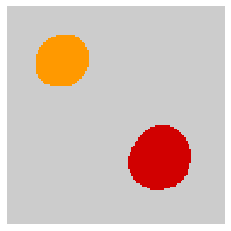

In [39]:
lv = torch.FloatTensor([pConverter(30), pConverter(90), pConverter(30), pConverter(90),
                        rConverter(15), rConverter(20)]).repeat(BATCH_SIZE, 1)
gen_images = aG(gen_rand_noise(), lv).view(BATCH_SIZE, CHANNEL, DIM, DIM)
image = gen_images.detach().numpy()
image = np.argmax(image, axis=1)
plt.imshow(image[0], cmap='nipy_spectral')
plt.axis('off')
plt.clim(-6, 1.5)